In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#My Functions
import src.limpieza_texto as lt

In [2]:
data = pd.read_csv("data/attacks.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)


In [3]:

data.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
data.shape

(25723, 24)

In [5]:
#Lets get rid of all the columns I know I am not going to need

data_clean_col = data.drop(columns=["Case Number","Unnamed: 22", "Unnamed: 23", "pdf", "href formula","href","original order","Case Number.1", "Case Number.2", "Investigator or Source"])
data_clean_col.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [6]:
data_clean_col.shape

(25723, 14)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2
19681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND.0008,ND.0008
21069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1783.03.02,02-Mar-1783,1783.0,Sea Disaster,MARTINIQUE,NaN,Foundering of the privateer Holker,NaN,NaN,M,NaN,Many of the crew were taken by sharks,Y,06h00,NaN,"C.Moore, GSAF",1783.03.02,1783.03.02
23176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6075,1837.09.03,09-Sep-1837,1837.0,Unprovoked,USA,South Carolina,"Magwoods Wharf, Charleston Harbor, Charleston ...",Bathing,a young boy from the Plymouth,M,NaN,Right foot bittten,N,NaN,NaN,"C. Creswell, GSAF; J. Hair, pp.65-66",1837.09.03,1837.09.03
20736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = data_clean_col.dropna(axis = 0, how = 'all')


In [8]:
df.shape

(6302, 14)

In [9]:
df.tail(100)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
6202,Before 1963,0.0,Unprovoked,DJIBOUTI,Gulf of Tadjoura,NaN,A dhow capsized,Passenger & crew,NaN,NaN,FATAL,Y,NaN,NaN
6203,1896-1913,0.0,Unprovoked,LIBYA,Cyrenaica,Kirinaiki,Sponge diving,a diver from Kalymnos,M,NaN,FATAL,Y,NaN,NaN
6204,Before 1936,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Net-fishing,August Eichmann,M,NaN,Calf bitten,N,NaN,NaN
6205,Before 08-Jun-1912,0.0,Unprovoked,NEW ZEALAND,North Island,"Point Halsey, Wellington",NaN,Kai-tawaro,M,NaN,FATAL,Y,NaN,NaN
6206,Before 2012,0.0,Unprovoked,NaN,NaN,In a river feeding into the Bay of Bengal,Netting shrimp,Sametra Mestri,F,NaN,Hand severed,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [10]:
df['Year_cleaned'] = df[df['Year']>1930]['Year']



<ipython-input-10-cf0f67d75ecd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_cleaned'] = df[df['Year']>1930]['Year']


In [11]:
years_values = df['Year_cleaned'].value_counts().sort_index()


<AxesSubplot:>

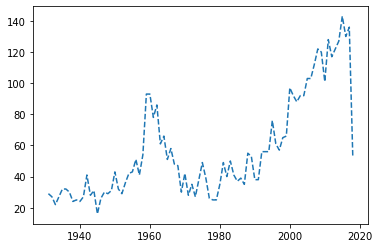

In [12]:
years_values.plot(style="--")

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Shark Attacks')]

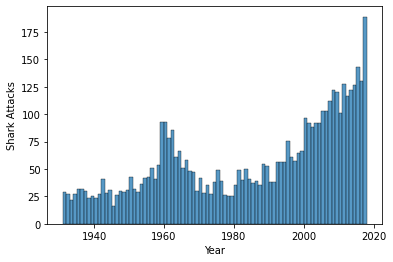

In [13]:
ax=sns.histplot(x=df.Year_cleaned, binwidth=1)
ax.set(xlabel="Year", ylabel = "Shark Attacks")


/home/fran/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-14-69e3451833e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lt.clean_age)
/home/fran/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level f

Text(0.5, 1.0, 'Shark Attacks vs Age')

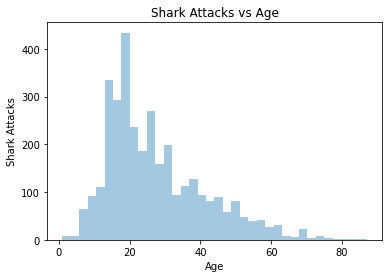

In [14]:
df['Age'].fillna(0 ,inplace=True)
df['Age'] = df['Age'].apply(lt.clean_age)
fig,ax = plt.subplots()
ax = sns.distplot(df['Age'].dropna(), kde=False)
plt.xlabel('Age')
plt.ylabel('Shark Attacks')
plt.title('Shark Attacks vs Age')


/home/fran/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

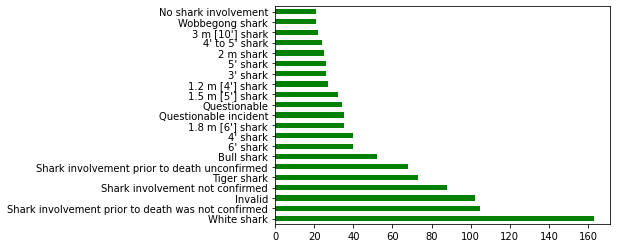

In [15]:
df.rename(columns={'Species ': 'Species'}, inplace=True)
sharks = df['Species'].value_counts()
sharks[sharks>20].plot.barh(color='green')
#Get all Species ending with "shark"


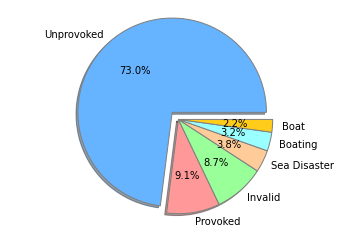

In [16]:
table_count = df['Type'].value_counts()
first_six_type = table_count.iloc[:6]
first_six_type
type_index = first_six_type.index
type_values = first_six_type.values
explode = ( 0.1, 0.0, 0., 0.0, 0.0,0 ) 
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99','#99ffff','#ffcc19']



fig1, ax1 = plt.subplots()
ax1.pie(type_values, explode=explode, labels=type_index, autopct='%1.1f%%', colors=colors,wedgeprops={'edgecolor': 'grey'}, shadow=True)
ax1.axis('equal') 

plt.show()

In [17]:
types1 = table_count.iloc[:6]
types1

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Name: Type, dtype: int64

In [19]:
act1 = types1.drop(['Invalid'])
total = act1.iloc[3:5].sum()
act1["TotalBoating"] = total
types_cleaned =act1.drop(['Boating', 'Boat'])
types_cleaned.sort_values(ascending=False, inplace=True)
types_cleaned


Unprovoked      4595
Provoked         574
TotalBoating     340
Sea Disaster     239
Name: Type, dtype: int64

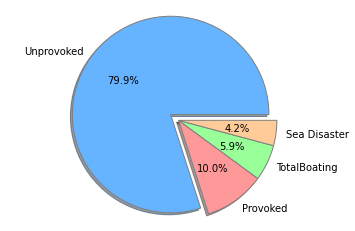

In [79]:
type_index = types_cleaned.index
type_values = types_cleaned.values
explode = ( .1, 0, 0, 0) 
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(type_values, explode=explode, labels=type_index, autopct='%1.1f%%', colors=colors,wedgeprops={'edgecolor': 'grey'}, shadow=True)
ax1.axis('equal') 

plt.show()

<AxesSubplot:>

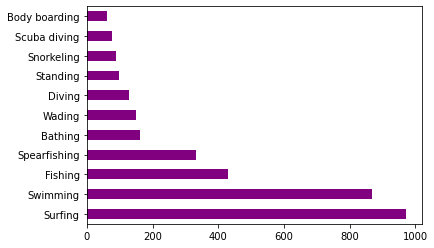

In [83]:
activities = df['Activity'].value_counts()
activities[activities>50].plot.barh(color='purple')

In [39]:
countries_group = df.groupby("Country").filter(lt.filter_countries_by_attack_number)
countries_group_counts = countries_group.Country.value_counts()
countries_group_counts.plot.barh(color='blue')

TypeError: filter function returned a DataFrame, but expected a scalar bool